# Exploring a Crime DataSet

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases
# I will use %matplotlib inline-To make the plots to appear directly below the cells
%matplotlib inline

In [ ]:
#UTF-8 encoding gave an error
#Now to find the encodings that works

In [23]:
alias_values =set(aliases.values())
for encoding in set (aliases.values()):
    try:
        df=pd.read_csv(r"C:\Users\hp\Desktop\Portfolio Projects\crime.csv",nrows=5,encoding=encoding)
        print ('successful',encoding)
    except:
        pass

successful cp866
successful cp1140
successful big5hkscs
successful hp_roman8
successful mac_turkish
successful mac_cyrillic
successful cp437
successful iso8859_13
successful cp869
successful iso8859_5
successful iso8859_15
successful cp1254
successful cp1253
successful mac_iceland
successful cp500
successful cp1250
successful koi8_r
successful cp949
successful cp857
successful cp852
successful mac_latin2
successful iso8859_4
successful gbk
successful cp1258
successful cp862
successful cp1251
successful kz1048
successful cp855
successful gb18030
successful cp1255
successful cp858
successful mac_greek
successful ptcp154
successful iso8859_9
successful cp1125
successful cp850
successful latin_1
successful cp1026
successful iso8859_8
successful cp037
successful cp775
successful iso8859_3
successful cp863
successful iso8859_16
successful cp273
successful cp860
successful mac_roman
successful iso8859_11
successful iso8859_14
successful iso8859_6
successful cp1256
successful iso8859_10
succes

In [24]:
#Using the timestamp as a datetime index
crime=pd.read_csv(r"C:\Users\hp\Desktop\Portfolio Projects\crime.csv", encoding="iso8859_16")

In [25]:
#Having a look at the columns and the first few values of the dataset
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [26]:
#Checking the number or rows and columns in this dataset
crime.shape

(319073, 17)

In [ ]:
#Rows: 319073 and Columns: 17)

In [30]:
#Looking for duplicates and dropping the all the duplicated rows
crime.duplicated().sum()

crime.drop_duplicates(inplace=True)

In [31]:
crime.shape #Rows Down by 23

(319050, 17)

# Data Exploration

In [34]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,6/5/2016 17:25,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,7/9/2015 13:38,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,7/9/2015 13:38,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,5/31/2016 19:35,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [38]:
#To get some sammary info about thee dataframe and know the Datatype for each Column
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [41]:
#Convert the initial Datatypes to preferred type
#Eg Change the Date column from Object Datatype to Datetime Dtype
crime.OCCURRED_ON_DATE=pd.to_datetime(crime.OCCURRED_ON_DATE)

In [40]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

# EXTRACTING DATA

In [49]:
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
          ... 
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [45]:
#Getting the summary info on the numeric columns
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
...,...,...,...,...,...,...
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [50]:
#For non-numeric columns
crime.describe(include="object")

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [52]:
#Checking for any columns with Missing values
crime.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319072,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [53]:
np.sum (crime.isnull()!=0)

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
                      ...  
Lat                   19998
Long                  19998
Location                  0
Length: 17, dtype: int64

In [54]:
crime.columns[np.sum(crime.isnull())!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [56]:
#UNIQUE VALUES IN EVERY COLUMN
for col in crime.columns:
    unique_count=crime[col].nunique()
    print (col+"has"+str(unique_count)+"unique values")

INCIDENT_NUMBERhas282517unique values
OFFENSE_CODEhas222unique values
OFFENSE_CODE_GROUPhas67unique values
OFFENSE_DESCRIPTIONhas244unique values
DISTRICThas12unique values
REPORTING_AREAhas879unique values
SHOOTINGhas1unique values
OCCURRED_ON_DATEhas232566unique values
YEARhas4unique values
MONTHhas12unique values
DAY_OF_WEEKhas7unique values
HOURhas24unique values
UCR_PARThas4unique values
STREEThas4657unique values
Lathas18178unique values
Longhas18178unique values
Locationhas18194unique values


### Exploratory Questions

In [66]:
#Q1: What are the most common offense Descriptions
crime.OFFENSE_DESCRIPTION.value_counts()

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
                                               ...  
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

In [76]:
crime.OFFENSE_DESCRIPTION.value_counts()[:5]

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
Name: OFFENSE_DESCRIPTION, dtype: int64

In [77]:
offense_desc=crime.OFFENSE_DESCRIPTION.value_counts()[:5]
display(offense_desc/crime.shape[0])

SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
Name: OFFENSE_DESCRIPTION, dtype: float64

Text(0.5, 1.0, 'Most Common Offense Description')

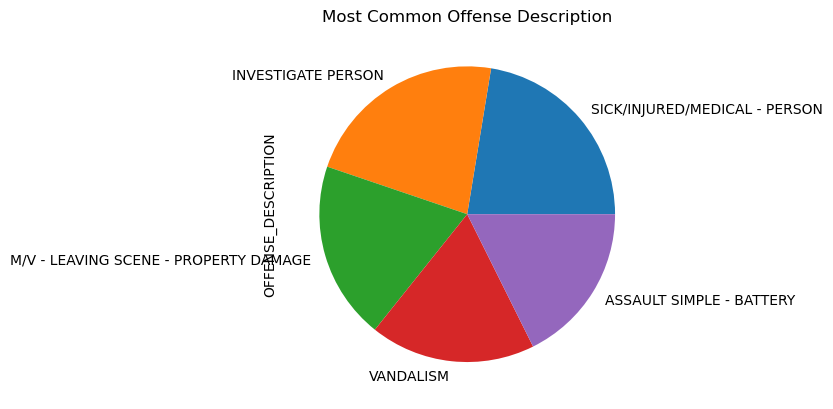

In [79]:
#Create A Line Chart Visual
(offense_desc/crime.shape[0]).plot(kind="pie")
plt.title("Most Common Offense Description")

In [57]:
#Q2: What offences are the most and least occuring
#LEAST
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
                                             ...  
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [59]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)

Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
                                             ...  
Medical Assistance                           23540
Larceny                                      25935
Motor Vehicle Accident Response              37132
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [61]:
#Limit the Count to the least 5
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:5]

Burglary - No Property Taken                 2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    2
Biological Threat                            2
INVESTIGATE PERSON                           4
HUMAN TRAFFICKING                            7
Name: OFFENSE_CODE_GROUP, dtype: int64

In [63]:
offense_vals=crime.OFFENSE_CODE_GROUP.value_counts()[:5]

In [64]:
display(offense_vals/crime.shape[0])

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Name: OFFENSE_CODE_GROUP, dtype: float64

Text(0.5, 1.0, 'Least Common Offense Groups')

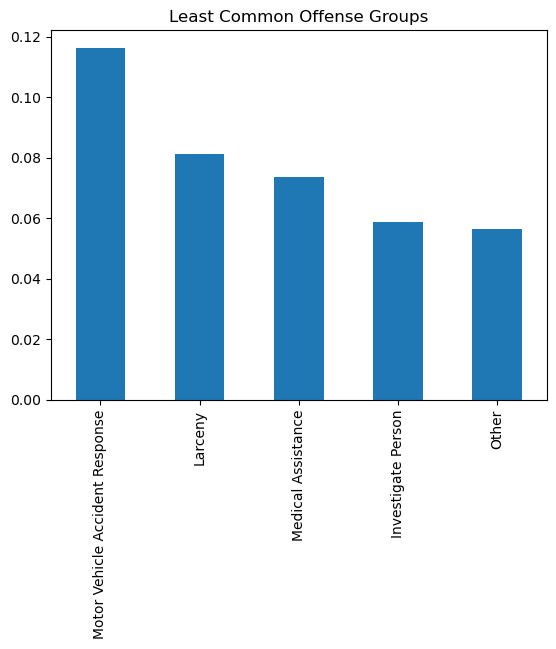

In [65]:
#Create A Bar Chart Visual
(offense_vals/crime.shape[0]).plot(kind="bar")
plt.title("Least Common Offense Groups")

In [ ]:
#Q3:In which year were the most crimes committed

In [82]:
crime.groupby("YEAR").count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,,,
2015,53371,53371,53371,53371,53243,53371,185,53371,53371,53371,53371,53370,52089,51190,51190,53371
2016,99110,99110,99110,99110,98593,99110,279,99110,99110,99110,99110,99076,93395,92339,92339,99110
2017,100884,100884,100884,100884,100308,100884,370,100884,100884,100884,100884,100845,98153,94059,94059,100884
2018,65685,65685,65685,65685,65141,65685,185,65685,65685,65685,65685,65669,64542,61464,61464,65685


In [83]:
crime.groupby("YEAR").count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

In [84]:
#Sorting from Lowest to highest
crime.groupby("YEAR").count()['INCIDENT_NUMBER'].sort_values(ascending=True)

YEAR
2015     53371
2018     65685
2016     99110
2017    100884
Name: INCIDENT_NUMBER, dtype: int64

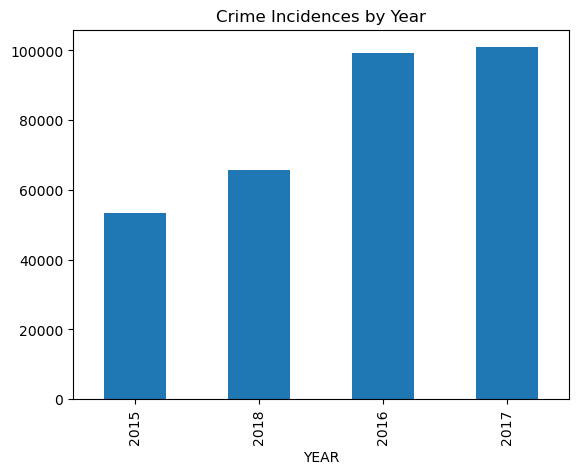

In [92]:
#Visualize the results
crime.groupby("YEAR").count()['INCIDENT_NUMBER'].sort_values(ascending=True).plot(kind='bar')
plt.title("Crime Incidences by Year");

In [ ]:
#Q4:What are the Crime peak days and hours?

In [97]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()["INCIDENT_NUMBER"]

HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
                     ... 
23    Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

In [98]:
#Unstack to separate days and hours as rows and columns
crime.groupby(['HOUR','DAY_OF_WEEK']).count()["INCIDENT_NUMBER"].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
...,...,...,...,...,...,...,...
21,2089,2003,2077,1902,2070,1925,2043
22,2160,1634,2113,1728,1795,1757,1738
23,1936,1243,1951,1380,1492,1296,1298


In [135]:
#Rearrange the Columns and arrange them from Monday to Sunday
hours_and_weeks=crime.groupby(['HOUR','DAY_OF_WEEK']).count()["INCIDENT_NUMBER"].unstack()

In [136]:
hours_and_weeks = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

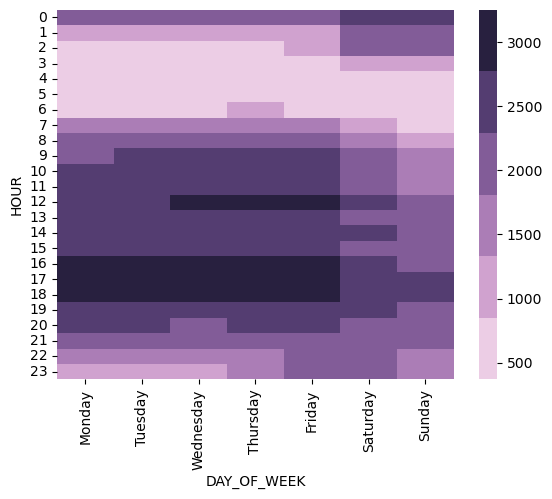

In [137]:
sns.heatmap(hours_and_weeks, cmap=sns.cubehelix_palette(rot=.2));

In [144]:
#Q5: On Average, which months did the most crimes occur?
#Calculate the Average crime per month first
avg_crime=crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("Average number of crime is "+ str(avg_crime))

months_and_years =crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

Average number of crime is 7976.25


In [148]:
#Table representation with colour Orange for less than average and default for above average

def style_negative (v,props=''):
    return props if v<avg_crime else None
s2=months_and_years.style.applymap(style_negative, props='color:orange;')\
    .applymap(lambda v:'opacity:20%;'if (v<0.3) and (v>-0.3) else None)
s2

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [145]:
#Highlight the maximum in each column in purple

def highlight_max(s,props=''):
    return np.where(s==np.nanmax(s.values),props,'')
s2.apply(highlight_max,props='color:white;background-color:purple', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000
